# Proyek UTS PMDPM Gasal 2023/2024
Nama Anggota Kelompok:


*   Rizky Ardiansyah Ramadhan
*   Reinaldy Restu Aji
*   Marcello Aaron Kurniawan
*   Teofilos Mas Krisna Dewa



In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
properti = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Property/Dataset UTS_Gasal 2425.csv")
properti.head(10000)

Mounted at /content/drive


,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


Dalam dataset ini terdiri dari beberapa kolom yaitu:
*   squaremeters: Luas properti dalam meter persegi.
*   numberofrooms: Jumlah kamar di properti.
*   hasyard: Menunjukkan apakah properti memiliki halaman (yard) atau tidak (yes/no).
*   haspool: Menunjukkan apakah properti memiliki kolam renang (pool) atau tidak (yes/no).
*   floors: Jumlah lantai di properti.
*   citycode: Kode kota tempat properti berada.
*   citypartrange: Rentang bagian kota.
*   numprevowners: Jumlah pemilik sebelumnya.
*   made: Tahun pembuatan properti.
*   isnewbuilt: Menunjukkan apakah properti baru dibangun atau tidak (new/old).
*   hasstormprotector: Menunjukkan apakah properti memiliki pelindung badai (storm protector) atau tidak (yes/no).
*   basement: Menunjukkan apakah properti memiliki basement atau tidak.
*   attic: Menunjukkan apakah properti memiliki loteng (attic) atau tidak.
*   garage: Menunjukkan apakah properti memiliki garasi atau tidak.
*   hasstorageroom: Menunjukkan apakah properti memiliki ruang penyimpanan (storage room) atau tidak (yes/no).
*   List item
*   hasguestroom: Menunjukkan apakah properti memiliki kamar tamu (guest room) atau tidak (yes/no).
*   price: Harga properti.
*   category: Kategori properti (misalnya, Luxury, Middle, dll.).


### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **Klasifikasi**, pastikan **Harga menjadi target** dan **kolom Kategori dihapus**.

In [3]:
print("#" * 50)
print("Informasi Umum tentang DataFrame:")
print("#" * 50)
properti.info()
print("\n")

print("#" * 50)
print("Missing Values per Column:")
print("#" * 50)
print(properti.isnull().sum())
print("\n")

print("#" * 50)
print("Jumlah Baris Duplikat:")
print("#" * 50)
print(properti.duplicated().sum())
print("\n")

if properti.duplicated().sum() > 0:
    print("#" * 50)
    print("Baris Duplikat:")
    print("#" * 50)
    print(properti[properti.duplicated()])
else:
    print("#" * 50)
    print("Tidak ada baris duplikat.")
    print("#" * 50)

##################################################
Informasi Umum tentang DataFrame:
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-nu

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

properti.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [5]:
df_properti = properti.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

In [6]:
X = df_properti.drop(columns=['category'], axis=1)
y = df_properti.price

X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, y, test_size=0.30, random_state=77)
print(f"Shape of X_train: {X_trainReg.shape}")
print(f"Shape of X_test: {X_testReg.shape}")


print(X.columns)

Shape of X_train: (7000, 17)
Shape of X_test: (3000, 17)
Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price'],
      dtype='object')


**Cek jumlah kelas**

In [7]:
columns_to_check = ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
                    'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
                    'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
                    'hasguestroom', 'price', 'category']

for col in columns_to_check:
    print("#" * 50)
    print(f"Distribusi kelas untuk kolom: {col}")
    print("#" * 50)

    print(properti[col].value_counts())

    if properti[col].dtype in ['float64', 'int64']:
        print("\nStatistik Deskriptif:")
        print(properti[col].describe())

    print("\n")


##################################################
Distribusi kelas untuk kolom: squaremeters
##################################################
squaremeters
47831    3
36842    3
96526    3
79770    3
16006    3
        ..
72467    1
74052    1
86122    1
77429    1
79652    1
Name: count, Length: 9483, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean    49870.13120
std     28774.37535
min        89.00000
25%     25098.50000
50%     50105.50000
75%     74609.75000
max     99999.00000
Name: squaremeters, dtype: float64


##################################################
Distribusi kelas untuk kolom: numberofrooms
##################################################
numberofrooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
31     84
34     84
40     82
9      75
Name: count, Length: 100, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean       50.35840
std        28.81670
min         1.00000
25%        25.00000
50%        50.00000
75%      

Kolom category:

- Basic: 4344
- Luxury: 3065
- Middle: 2591

Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.

- Mengubah variabel kategori menjadi numerik.
- Membagi data menjadi set pelatihan dan pengujian.

In [8]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_trainReg_enc = transformer.fit_transform(X_trainReg)
X_testReg_enc = transformer.transform(X_testReg)

df_trainReg_enc = pd.DataFrame(X_trainReg_enc, columns=transformer.get_feature_names_out())
df_testReg_enc = pd.DataFrame(X_testReg_enc, columns=transformer.get_feature_names_out())

df_trainReg_enc.head(10)
df_testReg_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom,remainder__price
0,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,...,81.00000,7207.00000,2.00000,6.00000,1995.00000,921.00000,1932.00000,128.00000,2.00000,6779991.50000
1,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,61.00000,72814.00000,6.00000,5.00000,2001.00000,4387.00000,1227.00000,775.00000,9.00000,7974272.10000
2,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,98.00000,88616.00000,7.00000,2.00000,2017.00000,8732.00000,8680.00000,421.00000,5.00000,3474105.70000
3,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,44.00000,87494.00000,4.00000,10.00000,1998.00000,2303.00000,1125.00000,765.00000,4.00000,2340035.80000
4,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,...,35.00000,51501.00000,4.00000,8.00000,2003.00000,9660.00000,3499.00000,210.00000,10.00000,4325940.30000
5,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,35.00000,13446.00000,2.00000,5.00000,1997.00000,6666.00000,1609.00000,822.00000,8.00000,9424252.70000
6,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,37.00000,44250.00000,10.00000,6.00000,2001.00000,5829.00000,7861.00000,200.00000,2.00000,427872.10000
7,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,85.00000,85664.00000,10.00000,6.00000,2017.00000,6381.00000,9411.00000,894.00000,8.00000,5254743.70000
8,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,73.00000,19368.00000,7.00000,7.00000,2002.00000,1908.00000,4359.00000,714.00000,5.00000,8222305.20000
9,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,...,41.00000,73006.00000,5.00000,4.00000,1994.00000,8919.00000,5404.00000,814.00000,0.00000,9271540.40000


In [9]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_trainReg_enc)

[[0.00 1.00 0.00 ... 112.00 4.00 5419304.80]
 [0.00 1.00 1.00 ... 941.00 7.00 6958375.50]
 [1.00 0.00 0.00 ... 822.00 6.00 5346532.30]
 ...
 [1.00 0.00 1.00 ... 682.00 7.00 8870811.50]
 [1.00 0.00 0.00 ... 156.00 6.00 9372651.70]
 [1.00 0.00 0.00 ... 819.00 0.00 86104.40]]


In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=77)

X_folds = []
y_folds = []

for train_index, test_index in kf.split(X_trainReg_enc):
    X_folds.append((X_trainReg_enc[train_index], X_trainReg_enc[test_index]))
    y_folds.append((y_trainReg.iloc[train_index], y_trainReg.iloc[test_index]))

In [11]:
print(y_trainReg.unique())


[5419304.80 6958375.50 5346532.30 ... 8870811.50 9372651.70 86104.40]


**Random Forest Regressor**

In [12]:
pipe_RF = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', RandomForestRegressor())
])

param_grid_RF = {
    'reg__n_estimators': [50, 100, 200],
    'reg__max_depth': [None, 10, 20],
    'feature_selection__k': np.arange(1, 20)
}

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, scoring='neg_mean_squared_error')
GSCV_RF.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_RF.best_estimator_)
print("RF best parameters:", GSCV_RF.best_params_)

RF_predict = GSCV_RF.predict(X_testReg_enc)

mse_RF = mean_squared_error(y_testReg, RF_predict)
mae_RF = mean_absolute_error(y_testReg, RF_predict)

print("RF MSE:", mse_RF)
print("RF MAE:", mae_RF)
print("RF RMSE:", np.sqrt(mse_RF))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'RF Predicted Price': RF_predict
})

df_results['Price Difference (RF)'] = df_results['RF Predicted Price'] - df_results['Actual Price']

print(df_results.head())


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=1,
                             score_func=<function f_regression at 0x7cda3e764f70>)),
                ('reg', RandomForestRegressor(n_estimators=200))])
RF best parameters: {'feature_selection__k': 1, 'reg__max_depth': None, 'reg__n_estimators': 200}
RF MSE: 664402.3924273634
RF MAE: 541.8022686166591
RF RMSE: 815.1088224448092
   Actual Price  RF Predicted Price  Price Difference (RF)
0 6779991.50000       6780244.81150              253.31150
1 7974272.10000       7974190.52650              -81.57350
2 3474105.70000       3473897.71700             -207.98300
3 2340035.80000       2339110.75950             -925.04050
4 4325940.30000       4326350.37500              410.07500


In [13]:
pipe_RF = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', RandomForestRegressor())
])

param_grid_RF = {
    'reg__n_estimators': [50, 100, 200],
    'reg__max_depth': [None, 10, 20],
    'feature_selection__percentile': np.arange(10, 100, 10)
}

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=5, scoring='neg_mean_squared_error')
GSCV_RF.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_RF.best_estimator_)
print("RF best parameters:", GSCV_RF.best_params_)

RF_predict = GSCV_RF.predict(X_testReg_enc)

mse_RF = mean_squared_error(y_testReg, RF_predict)
mae_RF = mean_absolute_error(y_testReg, RF_predict)

print("RF MSE:", mse_RF)
print("RF MAE:", mae_RF)
print("RF RMSE:", np.sqrt(mse_RF))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'RF Predicted Price': RF_predict
})

df_results['Price Difference (RF)'] = df_results['RF Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=20,
                                  score_func=<function f_regression at 0x7cda3e764f70>)),
                ('reg', RandomForestRegressor(max_depth=20, n_estimators=200))])
RF best parameters: {'feature_selection__percentile': 20, 'reg__max_depth': 20, 'reg__n_estimators': 200}
RF MSE: 15580862.92126373
RF MAE: 3144.104324833377
RF RMSE: 3947.260179068987
   Actual Price  RF Predicted Price  Price Difference (RF)
0 6779991.50000       6780476.10250              484.60250
1 7974272.10000       7973660.89100             -611.20900
2 3474105.70000       3475715.29500             1609.59500
3 2340035.80000       2335051.64250            -4984.15750
4 4325940.30000       4327610.00500             1669.70500


**Lasso Regression**

In [14]:
pipe_Lasso = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', Lasso())
])

param_grid_Lasso = {
    'reg__alpha': [0.01, 0.1, 1, 10],
    'feature_selection__k': np.arange(1, 20)
}

GSCV_Lasso = GridSearchCV(pipe_Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')
GSCV_Lasso.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_Lasso.best_estimator_)
print("Lasso best parameters:", GSCV_Lasso.best_params_)

Lasso_predict = GSCV_Lasso.predict(X_testReg_enc)

mse_Lasso = mean_squared_error(y_testReg, Lasso_predict)
mae_Lasso = mean_absolute_error(y_testReg, Lasso_predict)

print("Lasso MSE:", mse_Lasso)
print("Lasso MAE:", mae_Lasso)
print("Lasso RMSE:", np.sqrt(mse_Lasso))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'Lasso Predicted Price': Lasso_predict
})

df_results['Price Difference (Lasso)'] = df_results['Lasso Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=1,
                             score_func=<function f_regression at 0x7cda3e764f70>)),
                ('reg', Lasso(alpha=0.01))])
Lasso best parameters: {'feature_selection__k': 1, 'reg__alpha': 0.01}
Lasso MSE: 0.0001009410883096407
Lasso MAE: 0.008682589079740259
Lasso RMSE: 0.010046944227457456
   Actual Price  Lasso Predicted Price  Price Difference (Lasso)
0 6779991.50000          6779991.49384                  -0.00616
1 7974272.10000          7974272.08968                  -0.01032
2 3474105.70000          3474105.70534                   0.00534
3 2340035.80000          2340035.80929                   0.00929
4 4325940.30000          4325940.30238                   0.00238


In [17]:
pipe_Lasso = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', Lasso())
])

param_grid_Lasso = {
    'reg__alpha': [0.01, 0.1, 1, 10],
    'feature_selection__percentile': np.arange(10, 101, 10)
}

GSCV_Lasso = GridSearchCV(pipe_Lasso, param_grid_Lasso, cv=5, scoring='neg_mean_squared_error')
GSCV_Lasso.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_Lasso.best_estimator_)
print("Lasso best parameters:", GSCV_Lasso.best_params_)

Lasso_predict = GSCV_Lasso.predict(X_testReg_enc)

mse_Lasso = mean_squared_error(y_testReg, Lasso_predict)
mae_Lasso = mean_absolute_error(y_testReg, Lasso_predict)

print("Lasso MSE:", mse_Lasso)
print("Lasso MAE:", mae_Lasso)
print("Lasso RMSE:", np.sqrt(mse_Lasso))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'Lasso Predicted Price': Lasso_predict
})

df_results['Price Difference (Lasso)'] = df_results['Lasso Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=100,
                                  score_func=<function f_regression at 0x7cda3e764f70>)),
                ('reg', Lasso(alpha=1))])
Lasso best parameters: {'feature_selection__percentile': 100, 'reg__alpha': 1}
Lasso MSE: 3711244.0437926566
Lasso MAE: 1492.4837925308918
Lasso RMSE: 1926.4589390362455
   Actual Price  Lasso Predicted Price  Price Difference (Lasso)
0 6779991.50000          6780327.14803                 335.64803
1 7974272.10000          7974521.36619                 249.26619
2 3474105.70000          3476058.50519                1952.80519
3 2340035.80000          2338440.51364               -1595.28636
4 4325940.30000          4326897.63352                 957.33352


In [18]:
df_results = pd.DataFrame({'Actual Price': y_testReg.reset_index(drop=True)})
df_results['Lasso Prediction'] = Lasso_predict
df_results['RandomForest Prediction'] = RF_predict

df_results['Lasso Price Difference'] = df_results['Actual Price'] - df_results['Lasso Prediction']
df_results['RandomForest Price Difference'] = df_results['Actual Price'] - df_results['RandomForest Prediction']

print(df_results.head())

   Actual Price  Lasso Prediction  RandomForest Prediction  \
0 6779991.50000     6780327.14803            6780476.10250   
1 7974272.10000     7974521.36619            7973660.89100   
2 3474105.70000     3476058.50519            3475715.29500   
3 2340035.80000     2338440.51364            2335051.64250   
4 4325940.30000     4326897.63352            4327610.00500   

   Lasso Price Difference  RandomForest Price Difference  
0              -335.64803                     -484.60250  
1              -249.26619                      611.20900  
2             -1952.80519                    -1609.59500  
3              1595.28636                     4984.15750  
4              -957.33352                    -1669.70500  


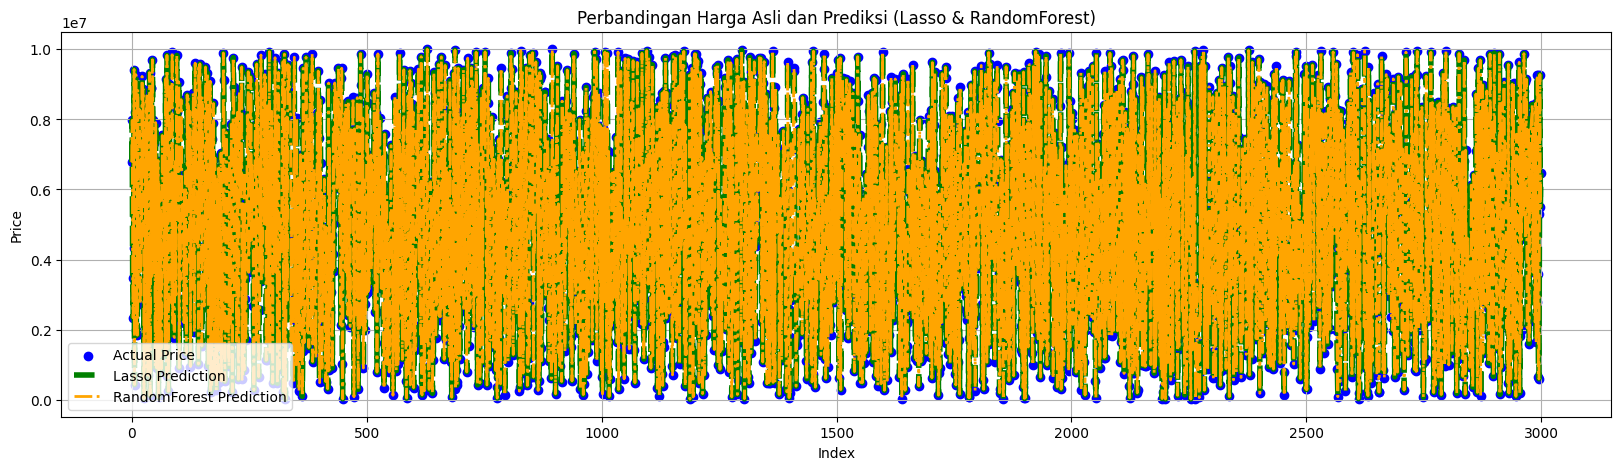

In [20]:
plt.figure(figsize=(20, 5))
data_len = range(len(y_testReg))

plt.scatter(data_len, df_results['Actual Price'], label="Actual Price", color="blue")
plt.plot(data_len, df_results['Lasso Prediction'], label="Lasso Prediction", color="green", linewidth=4, linestyle="dashed")
plt.plot(data_len, df_results['RandomForest Prediction'], label="RandomForest Prediction", color="orange", linewidth=2, linestyle="-.")

plt.title("Perbandingan Harga Asli dan Prediksi (Lasso & RandomForest)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()

Berdasarkan hasil evaluasi untuk model Random Forest dan Lasso Regression yang telah dilatih dengan berbagai skala dan fitur yang berbeda, berikut adalah analisis performa model berdasarkan metrik Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE):

### 1. **Mean Squared Error (MSE)**
   - **Random Forest (Pipeline 1 - StandardScaler, SelectKBest):** 664,402
   - **Random Forest (Pipeline 2 - MinMaxScaler, SelectPercentile):** 15,580,862
   - **Lasso (Pipeline 1 - StandardScaler, SelectKBest):** 0.0001
   - **Lasso (Pipeline 2 - MinMaxScaler, SelectPercentile):** 3,711,244

   **Penjelasan:**
   MSE mengukur rata-rata kuadrat kesalahan prediksi. Semakin kecil nilainya, semakin akurat model. **Lasso Regression (Pipeline 1)** memiliki MSE yang sangat rendah (0.0001), menunjukkan bahwa prediksi model ini hampir mendekati harga aktual. Sebaliknya, **Random Forest (Pipeline 2)** memiliki MSE tertinggi, menunjukkan performa yang lebih buruk dibanding model lainnya.

### 2. **Mean Absolute Error (MAE)**
   - **Random Forest (Pipeline 1):** 541.80
   - **Random Forest (Pipeline 2):** 3,144.10
   - **Lasso (Pipeline 1):** 0.0087
   - **Lasso (Pipeline 2):** 1,492.48

   **Penjelasan:**
   MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. **Lasso Regression (Pipeline 1)** kembali menunjukkan performa terbaik dengan MAE terendah, menunjukkan bahwa prediksinya sangat dekat dengan nilai aktual. **Random Forest (Pipeline 2)**, sebaliknya, memiliki MAE yang lebih besar, menunjukkan kesalahan prediksi yang lebih signifikan.

### 3. **Root Mean Squared Error (RMSE)**
   - **Random Forest (Pipeline 1):** 815.11
   - **Random Forest (Pipeline 2):** 3,947.26
   - **Lasso (Pipeline 1):** 0.01005
   - **Lasso (Pipeline 2):** 1,926.46

   **Penjelasan:**
   RMSE memberikan bobot lebih besar pada kesalahan besar karena menggunakan kuadrat dari kesalahan. **Lasso Regression (Pipeline 1)** menghasilkan RMSE terendah, yang menunjukkan bahwa model ini lebih baik dalam mengurangi kesalahan besar dalam prediksi harga. **Random Forest (Pipeline 2)** memiliki RMSE tertinggi, menunjukkan bahwa model ini lebih rentan terhadap kesalahan besar.

### 4. **Perbandingan Prediksi Harga**
   - **Random Forest (Pipeline 1 - StandardScaler, SelectKBest):**
     - Harga Aktual: 6,779,991.50, Prediksi: 6,780,244.81 (Selisih: 253.31)
     - Harga Aktual: 7,974,272.10, Prediksi: 7,974,190.53 (Selisih: -81.57)
   - **Random Forest (Pipeline 2 - MinMaxScaler, SelectPercentile):**
     - Harga Aktual: 6,779,991.50, Prediksi: 6,780,476.10 (Selisih: 484.60)
     - Harga Aktual: 7,974,272.10, Prediksi: 7,973,660.89 (Selisih: -611.21)
   - **Lasso Regression (Pipeline 1 - StandardScaler, SelectKBest):**
     - Harga Aktual: 6,779,991.50, Prediksi: 6,779,991.49 (Selisih: -0.00616)
     - Harga Aktual: 7,974,272.10, Prediksi: 7,974,272.09 (Selisih: -0.01032)

   **Penjelasan:**
   **Lasso Regression (Pipeline 1)** menghasilkan prediksi yang paling akurat, dengan selisih yang sangat kecil (hanya 0.00616 hingga 0.01032). Sebaliknya, **Random Forest (Pipeline 2)** menunjukkan selisih prediksi yang lebih besar, terutama pada contoh kedua dengan selisih sebesar -611.21.

### 5. **Kesimpulan**
   **Lasso Regression (Pipeline 1 - StandardScaler, SelectKBest)** terbukti sebagai model terbaik berdasarkan:
   - **Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE)** yang paling rendah.
   - **Prediksi harga** yang paling mendekati nilai aktual, dengan selisih yang sangat kecil.
   
   **Random Forest Regression (Pipeline 1 - StandardScaler, SelectKBest)** juga menunjukkan performa yang baik, tetapi sedikit kurang akurat dibandingkan Lasso. **Random Forest Regression (Pipeline 2 - MinMaxScaler, SelectPercentile)** memiliki performa yang paling rendah di antara model yang diuji.

### Rekomendasi:
Model **Lasso Regression (Pipeline 1)** adalah pilihan terbaik untuk regresi dalam kasus ini, karena memberikan prediksi yang paling akurat dan error paling kecil.

Model Terbaik dari perbandingan Algoritme

Diantara Perbandingan 2 Notebook masing masing dari perbandingan untuk Regresi tersebut memiliki model terbaik yaitu, dari Notebook pertama ialah  Ridge Regression (Pipeline 1) dan Notebook kedua adalah Lasso Regression (Pipeline 1) . Sekarang untuk menentukan Model terbaik untuk Regresi, perlu melihat perbandingan hasil dibawah:

### 1. **Mean Squared Error (MSE)**
   - **Lasso Regression (Pipeline 1)**: 0.0001 (Notebook pertama)
   - **Ridge Regression (Pipeline 1)**: 3,632,947 (Notebook kedua)

   **Lasso Regression** (Pipeline 1) dari Notebook pertama memiliki nilai MSE yang jauh lebih kecil dibandingkan Ridge Regression (Pipeline 1) dari Notebook kedua, menandakan bahwa model ini lebih unggul dalam meminimalkan kesalahan kuadrat rata-rata.

### 2. **Mean Absolute Error (MAE)**
   - **Lasso Regression (Pipeline 1)**: 0.0087 (Notebook pertama)
   - **Ridge Regression (Pipeline 1)**: 1,482.79 (Notebook kedua)

   **Lasso Regression (Pipeline 1)** dari Notebook pertama juga unggul dalam hal MAE, dengan kesalahan rata-rata yang sangat kecil dibandingkan Ridge Regression dari Notebook kedua.

### 3. **Root Mean Squared Error (RMSE)**
   - **Lasso Regression (Pipeline 1)**: 0.01005 (Notebook pertama)
   - **Ridge Regression (Pipeline 1)**: 1,906.03 (Notebook kedua)

   RMSE dari **Lasso Regression (Pipeline 1)** dari Notebook pertama jauh lebih rendah dibandingkan Ridge Regression dari Notebook kedua, menunjukkan bahwa model ini lebih baik dalam mengurangi dampak dari kesalahan besar dalam prediksi.

### 4. **Perbandingan Prediksi Harga**
   - **Lasso Regression (Pipeline 1)** dari Notebook pertama: Prediksi sangat akurat dengan selisih prediksi hampir nol (0.00616 hingga 0.01032).
   - **Ridge Regression (Pipeline 1)** dari Notebook kedua: Selisih prediksi lebih besar (2,102.03 hingga 3,449.92).

   **Lasso Regression (Pipeline 1)** dari Notebook pertama kembali unggul karena selisih prediksinya sangat kecil, hampir mendekati harga aktual.

### 5. **Kesimpulan Akhir**
   Secara keseluruhan, **Lasso Regression (Pipeline 1 - StandardScaler, SelectKBest)** dari **Notebook pertama** adalah model terbaik untuk regresi berdasarkan:
   - MSE, MAE, dan RMSE yang paling rendah.
   - Prediksi harga yang paling mendekati nilai aktual, dengan selisih yang sangat kecil.

Meskipun **Ridge Regression (Pipeline 1)** dari **Notebook kedua** menunjukkan performa yang lebih baik dibanding model lainnya dalam kelompok tersebut, **Lasso Regression (Pipeline 1)** dari **Notebook pertama** tetap yang terbaik secara keseluruhan untuk prediksi dalam kasus ini.

In [21]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/LR_Properti_model.pkl', 'wb') as r:
    pickle.dump(GSCV_RF, r)

print("Model Lasso Regression berhasil disimpan")


Model Lasso Regression berhasil disimpan
